**OBJECTIVE: EDA ON PLAYLISTS AND THEIR TRACKS BY DOWNSAMPLING**

The idea of square-root downsampling has been used on the 1Million Playlist Dataset, using popularity as separating class.
The method avoids throwing away too much niche data, preserves imbalance and controls dominance.
We end up with a 1040 playlists, with specific counts:

1.niche / personal:    ~1000

2.moderate:             25

3.popular:              12

4.very popular:           4

Popularity has been estimated by the number of followers per playlist.


**SECTIONS:**

**I.** General EDA has been done, using features existing in the original dataset, and addition features like: popularity_bucket, repeat rate, artist diversity ratio, average track duration.

**II.** NLP is used on playlist titles and song titles, to uncover sentiments, emotional genre, and other features.  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
playlists=pd.read_csv("/content/downsampled_playlists.csv")

In [ ]:
tracks=pd.read_csv("/content/downsampled_tracks.csv", on_bad_lines='skip')

In [ ]:
playlists.head()

,pid,name,description,num_tracks,num_artists,num_albums,num_followers,collaborative,modified_at,popularity_bucket
0,969308,Elvis Costello,NaN,194,3,37,778,False,1449619200,moderate
1,62957,Ellie Goulding,NaN,57,6,16,154,False,1425081600,moderate
2,577009,Rap Playlist,NaN,74,51,60,455,False,1474848000,moderate
3,507221,Spotify and Chill,NaN,18,18,18,315,False,1447718400,moderate
4,214454,october,NaN,30,23,23,124,False,1395878400,moderate


In [ ]:
playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pid                1040 non-null   int64 
 1   name               1040 non-null   object
 2   description        30 non-null     object
 3   num_tracks         1040 non-null   int64 
 4   num_artists        1040 non-null   int64 
 5   num_albums         1040 non-null   int64 
 6   num_followers      1040 non-null   int64 
 7   collaborative      1040 non-null   bool  
 8   modified_at        1040 non-null   int64 
 9   popularity_bucket  1040 non-null   object
dtypes: bool(1), int64(6), object(3)
memory usage: 74.3+ KB


In [ ]:
tracks.head()

,pid,track_uri,track_name,artist_uri,artist_name,album_uri,album_name,duration_ms,position
0,1173,spotify:track:1RnDdNwGdqTMSTiZmSLYdU,Maldita Dulzura,spotify:artist:6J6yx1t3nwIDyPXk5xa7O8,Vetusta Morla,spotify:album:1Oow7d8D859T5Xd2tsQUzG,Mapas,227546,0
1,1173,spotify:track:347xGYry34MgnQKTjKg4J3,Canción de Vuelta,spotify:artist:6J6yx1t3nwIDyPXk5xa7O8,Vetusta Morla,spotify:album:1Oow7d8D859T5Xd2tsQUzG,Mapas,233360,1
2,1173,spotify:track:5YqdZam9Ad85HrtrhzpCSk,Mapas,spotify:artist:6J6yx1t3nwIDyPXk5xa7O8,Vetusta Morla,spotify:album:1Oow7d8D859T5Xd2tsQUzG,Mapas,231746,2
3,1173,spotify:track:3kKC32g6Udc9wNHwZcMohb,Saharabbey Road,spotify:artist:6J6yx1t3nwIDyPXk5xa7O8,Vetusta Morla,spotify:album:7ozOQXEfKskKDTtDpmTnuh,Un Día en el Mundo,277653,3
4,1173,spotify:track:1ZaQfoHeFmItKM2ZF4MERf,Escudo Humano,spotify:artist:6J6yx1t3nwIDyPXk5xa7O8,Vetusta Morla,spotify:album:1Oow7d8D859T5Xd2tsQUzG,Mapas,275360,4


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68470 entries, 0 to 68469
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pid          68470 non-null  int64 
 1   track_uri    68470 non-null  object
 2   track_name   68470 non-null  object
 3   artist_uri   68470 non-null  object
 4   artist_name  68470 non-null  object
 5   album_uri    68470 non-null  object
 6   album_name   68470 non-null  object
 7   duration_ms  68470 non-null  int64 
 8   position     68470 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


# **SECTION 1: EDA WITH PRE-EXISTING FEATURES**

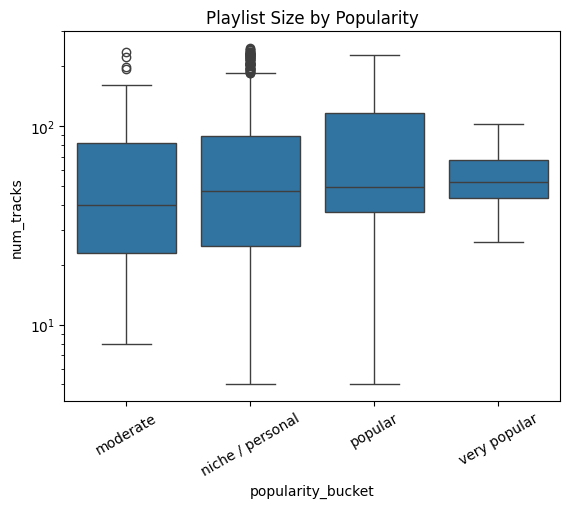

In [ ]:
#playlist size

sns.boxplot(
    x="popularity_bucket",
    y="num_tracks",
    data=playlists
)
plt.yscale("log")
plt.xticks(rotation=30)
plt.title("Playlist Size by Popularity")
plt.show()


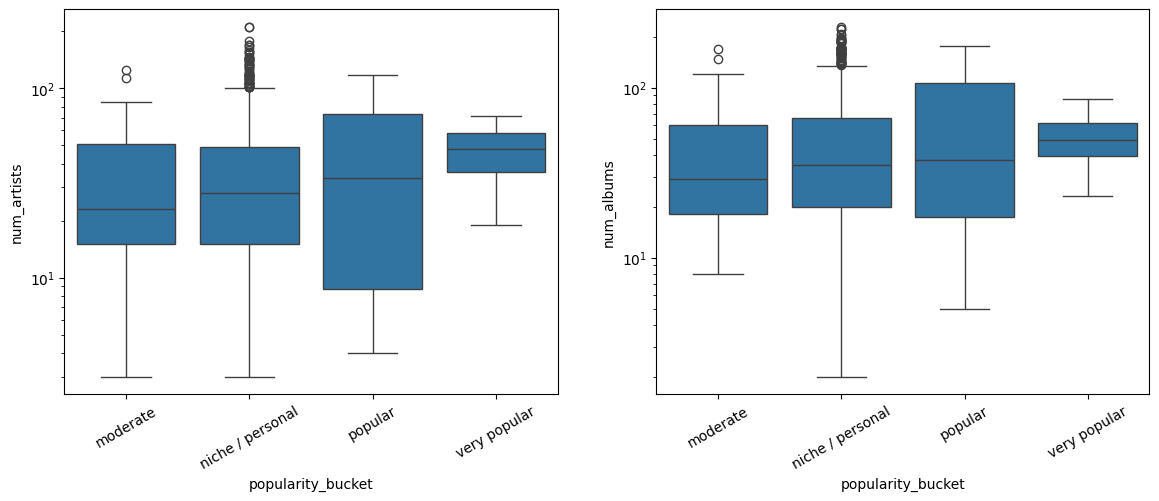

In [ ]:
#artist and album diversity

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    x="popularity_bucket",
    y="num_artists",
    data=playlists,
    ax=axes[0]
)
sns.boxplot(
    x="popularity_bucket",
    y="num_albums",
    data=playlists,
    ax=axes[1]
)

for ax in axes:
    ax.set_yscale("log")
    ax.tick_params(axis="x", rotation=30)

plt.show()


In [ ]:
#collaboration

pd.crosstab(
    playlists["popularity_bucket"],
    playlists["collaborative"],
    normalize="index"
)


collaborative,False,True
popularity_bucket,,
moderate,1.000000,0.000000
niche / personal,0.975976,0.024024
popular,1.000000,0.000000
very popular,1.000000,0.000000


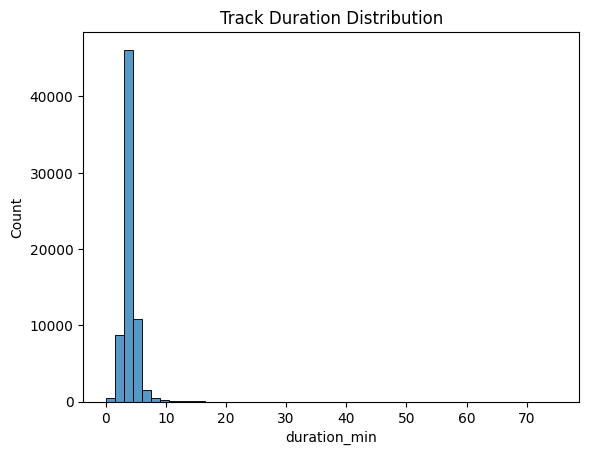

In [ ]:
#Track level EDA

#Track position distribution

tracks["duration_min"] = tracks["duration_ms"] / 60000

sns.histplot(tracks["duration_min"], bins=50)
plt.title("Track Duration Distribution")
plt.show()


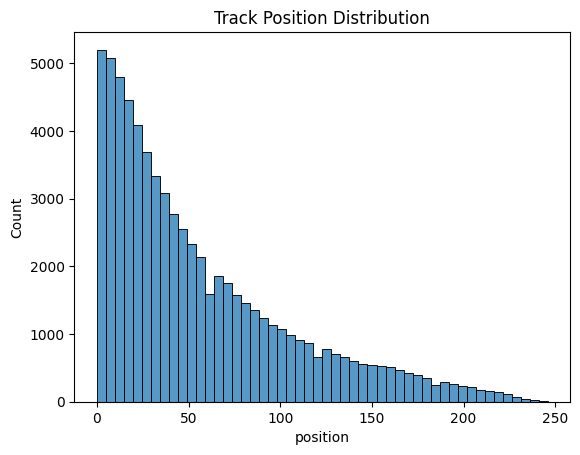

In [ ]:
#Track position distribution

sns.histplot(tracks["position"], bins=50)
plt.title("Track Position Distribution")
plt.show()


In [ ]:
#Build Structural signals

# artist repetition
tracks["repeat_artist"] = (
    tracks
    .groupby(["pid", "artist_name"])["artist_name"]
    .transform("count") > 1
)

playlist_struct = (
    tracks
    .groupby("pid")
    .agg(
        avg_duration=("duration_min", "mean"),
        repeat_rate=("repeat_artist", "mean"),
        unique_artists=("artist_name", "nunique")
    )
    .reset_index()
)


In [ ]:
playlist_struct["artist_diversity_ratio"] = (
    playlist_struct["unique_artists"] /
    tracks.groupby("pid").size().values
)


In [ ]:
df = playlists.merge(playlist_struct, on="pid")

In [ ]:
#Interactive Structure Map (Plotly)

import plotly.express as px

fig = px.scatter(
    df,
    x="artist_diversity_ratio",
    y="repeat_rate",
    color="popularity_bucket",
    size="num_tracks",
    hover_name="name",
    log_x=True,
    title="Structural Space of Playlists by Popularity"
)

fig.show()


In [ ]:
#Narrative Arc by Popularity (Very Strong)

arc_df = (
    tracks
    .merge(playlists[["pid", "popularity_bucket"]], on="pid")
    .groupby(["popularity_bucket", "position"])["repeat_artist"]
    .mean()
    .reset_index()
)


In [ ]:
fig = px.line(
    arc_df,
    x="position",
    y="repeat_artist",
    color="popularity_bucket",
    title="Narrative Sequencing Differs by Playlist Popularity"
)

fig.show()


In [ ]:
#Intent vs Popularity (Description Signal)

df["has_description"] = df["description"].notnull()

fig = px.box(
    df,
    x="popularity_bucket",
    y="repeat_rate",
    color="has_description",
    title="Explicit Intent Amplifies Structural Care"
)

fig.show()


In [ ]:
#Interactive Playlist Explorer (Dashboard-style)

fig = px.scatter(
    df,
    x="num_tracks",
    y="repeat_rate",
    color="popularity_bucket",
    hover_data=[
        "name",
        "num_artists",
        "artist_diversity_ratio",
        "avg_duration"
    ],
    log_x=True,
    title="Explore Playlists as Emotional Artifacts"
)

fig.show()


In [ ]:
#Random Baseline Overlay (Final Boss)

def random_repeat(df):
    shuffled = df.copy()
    shuffled["artist_name"] = shuffled.groupby("pid")["artist_name"].transform(
        np.random.permutation
    )
    return shuffled.groupby("position")["repeat_artist"].mean()


In [ ]:
#Interactive “Love Arc” Visualization (Plotly)

import plotly.express as px

merged = tracks.merge(
    playlists[["pid", "popularity_bucket"]],
    on="pid"
)

sample_pids = (
    playlists
    .groupby("popularity_bucket", group_keys=False)
    .apply(lambda g: g.sample(n=min(len(g), 5), random_state=42))
    ["pid"]
)

subset = merged[merged["pid"].isin(sample_pids)]

fig = px.line(
    subset,
    x="position",
    y="duration_ms",
    color="popularity_bucket",
    line_group="pid",
    hover_data=["track_name", "artist_name"],
    title="Emotional Arcs: Track Sequencing by Popularity"
)

fig.show()


/tmp/ipython-input-4030911344.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
#Playlist “Intent Density” Map (Plotly Scatter)

fig = px.scatter(
    playlists,
    x="num_tracks",
    y="num_artists",
    size="num_followers",
    color="popularity_bucket",
    hover_data=["name"],
    title="Playlist Density: Fewer Artists, Stronger Intent"
)
fig.show()


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()
source = ColumnDataSource(playlists)

p = figure(
    title="Playlist Structure Explorer",
    x_axis_label="Tracks",
    y_axis_label="Artists",
    tools="hover"
)

p.scatter(
    x="num_tracks",
    y="num_artists",
    source=source,
    marker="circle",
    size=7,
    alpha=0.6
)

show(p)


In [ ]:
#Position Entropy Heatmap (Plotly)

import numpy as np

def entropy(x):
    p = x.value_counts(normalize=True)
    return -(p * np.log2(p)).sum()

entropy_df = (
    tracks
    .merge(playlists[["pid", "popularity_bucket"]], on="pid")
    .groupby(["popularity_bucket", "position"])["artist_name"]
    .apply(entropy)
    .reset_index(name="entropy")
)

fig = px.density_heatmap(
    entropy_df,
    x="position",
    y="popularity_bucket",
    z="entropy",
    title="Position Entropy Across Popularity Buckets"
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="avg_duration",
    y="num_followers",
    color="popularity_bucket",
    size="num_tracks", # Size by number of tracks to add another dimension
    hover_name="name",
    log_y=True, # Log scale for followers might be useful due to skewed distribution
    title="Average Track Duration vs. Number of Followers by Popularity"
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    playlists,
    x="num_artists",
    y="num_albums",
    color="popularity_bucket",
    size="num_followers", # Size by number of followers
    hover_name="name",
    log_x=True, # Log scale for num_artists as it can vary widely
    log_y=True, # Log scale for num_albums as it can vary widely
    title="Number of Artists vs. Number of Albums by Popularity"
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="artist_diversity_ratio",
    y="avg_duration",
    color="popularity_bucket",
    size="num_followers", # Size by number of followers
    hover_name="name",
    log_x=False, # artist_diversity_ratio is a ratio, log scale might not be ideal
    log_y=False, # avg_duration is in minutes, log scale might not be ideal
    title="Artist Diversity Ratio vs. Average Track Duration by Popularity"
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="repeat_rate",
    y="num_followers",
    color="popularity_bucket",
    size="num_tracks", # Size by number of tracks
    hover_name="name",
    log_y=True, # Log scale for followers for better visualization of skewed data
    title="Artist Repeat Rate vs. Number of Followers by Popularity"
)

fig.show()

# **SECTION 2: EDA USING NLP**

In [ ]:
#Working with playlist names

# Keep only valid playlist names
playlists = playlists[playlists['name'].notna()]
playlists['name'] = playlists['name'].astype(str)

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

playlists['clean_name'] = playlists['name'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#most common words

from collections import Counter

all_words = " ".join(playlists['clean_name']).split()
word_freq = Counter(all_words)

print(word_freq.most_common(20))


[('music', 30), ('summer', 28), ('chill', 22), ('country', 22), ('playlist', 21), ('songs', 20), ('rock', 19), ('good', 18), ('party', 18), ('feels', 14), ('rap', 12), ('mix', 12), ('work', 11), ('new', 11), ('love', 11), ('oldies', 10), ('workout', 9), ('christmas', 9), ('throwback', 9), ('car', 8)]


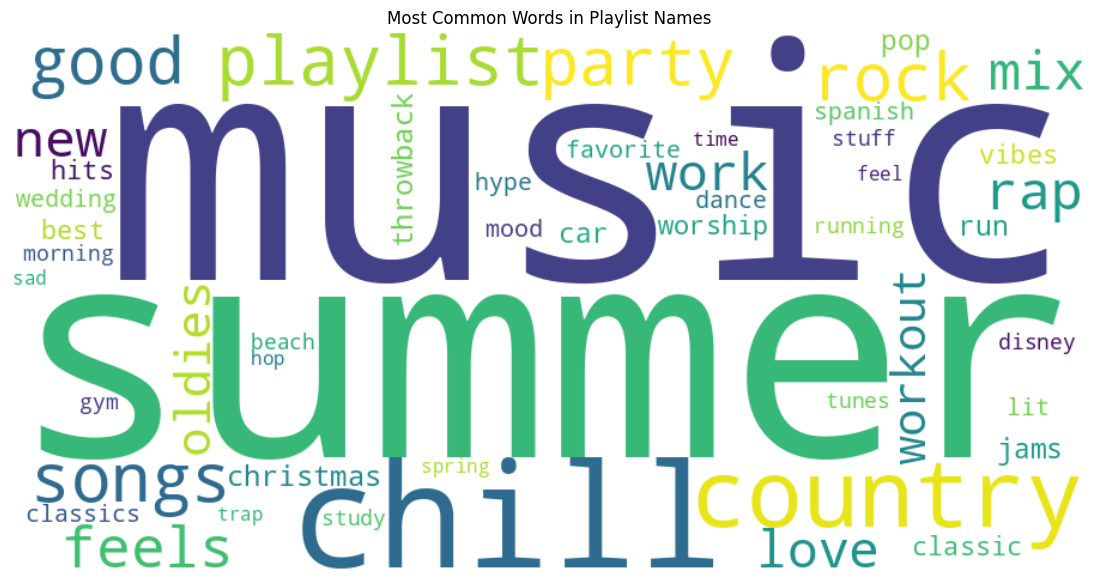

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

all_words = " ".join(playlists['clean_name']).split()
word_freq = Counter(all_words)

wc = WordCloud(
    width=900,
    height=450,
    background_color="white",
    max_words=50
).generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Playlist Names")
plt.show()


In [ ]:
!pip install sentence-transformers hdbscan umap-learn

In [ ]:
#TF-IDF + CLUSTERING (THEME DISCOVERY)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5
)

embeddings = vectorizer.fit_transform(
    playlists['clean_name']
).toarray()





In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=10,
    metric='euclidean'
)

playlists['cluster'] = clusterer.fit_predict(embeddings)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning:

invalid escape sequence '\{'



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!



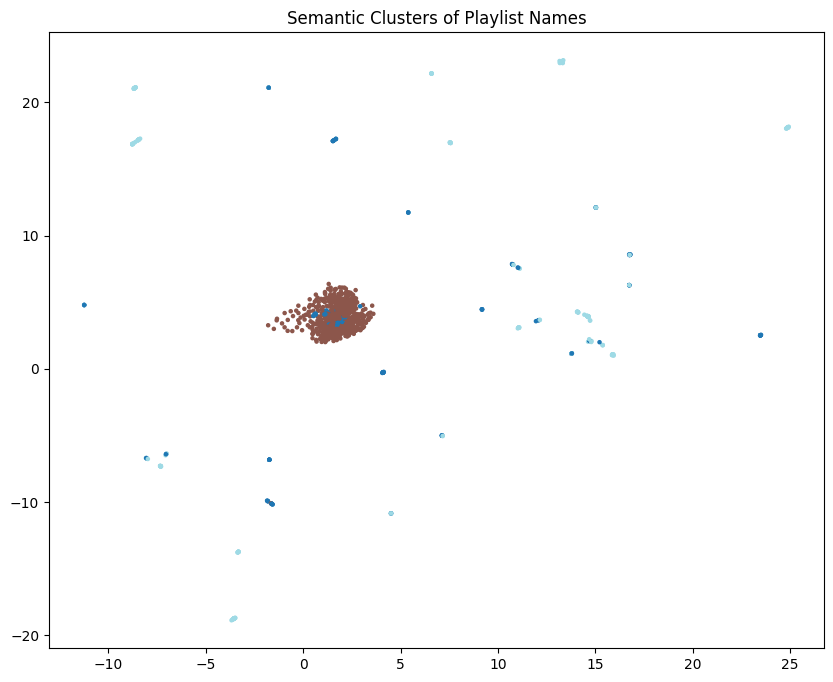

In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

umap_emb = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(
    umap_emb[:, 0],
    umap_emb[:, 1],
    c=playlists['cluster'],
    s=5,
    cmap="tab20"
)
plt.title("Semantic Clusters of Playlist Names")
plt.show()


In [ ]:
import sys
!{sys.executable} -m pip install vaderSentiment

#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# The original code had df['playlist_name'], but based on previous cells,
# the playlist name is in df['name'] or df['clean_name'].
# I'll use 'name' here assuming it's the original playlist name.
playlists['sentiment_score'] = playlists['name'].apply(get_sentiment)

def sentiment_label(score):
    if score >= 0.3:
        return "positive"
    elif score <= -0.3:
        return "negative"
    else:
        return "neutral"

playlists['sentiment'] = playlists['sentiment_score'].apply(sentiment_label)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.9 MB/s eta 0:00:00


In [ ]:
import plotly.express as px

# Visualize sentiment score distribution across popularity buckets
fig_score = px.box(
    playlists,
    x="popularity_bucket",
    y="sentiment_score",
    color="popularity_bucket",
    title="Sentiment Score Distribution by Playlist Popularity"
)
fig_score.show()

# Visualize sentiment categories distribution across popularity buckets
sentiment_counts = playlists.groupby(['popularity_bucket', 'sentiment']).size().reset_index(name='count')
fig_sentiment = px.bar(
    sentiment_counts,
    x="popularity_bucket",
    y="count",
    color="sentiment",
    barmode="group",
    title="Sentiment Categories by Playlist Popularity"
)
fig_sentiment.show()

In [ ]:
sentiment_ratios = (
    playlists
    .groupby(["popularity_bucket", "sentiment"])
    .size()
    .reset_index(name="count")
)

sentiment_ratios["ratio"] = (
    sentiment_ratios["count"]
    / sentiment_ratios.groupby("popularity_bucket")["count"].transform("sum")
)
fig_sentiment = px.bar(
    sentiment_ratios,
    x="popularity_bucket",
    y="ratio",
    color="sentiment",
    barmode="stack",
    title="Sentiment Composition by Playlist Popularity"
)

fig_sentiment.update_yaxes(tickformat=".0%", range=[0, 1])
fig_sentiment.show()
